# Zillow Prize Challenge

### Import some libraries

In [1]:
import pandas as pd
import numpy as np
import pdb
import math
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import datetime as dt
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy.spatial.distance as ssd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import KMeans
import folium
import random
from math import sin, cos, sqrt, atan2, radians
from uszipcode import ZipcodeSearchEngine
from sklearn import linear_model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
colors = ['red','blue','gray','darkred','lightred','orange','beige','green','darkgreen',
          'lightgreen','darkblue','lightblue','purple','darkpurple','pink','cadetblue',
          'lightgray','black']

colors_used = ['#C5539F','#765622','#A45BDE','#5C2ADD','#D41CA7','#A01725','#269935','#837EAF','#E7DE87',
               '#C31080','#CBB4E0','#BF8B81','#A6B078','#33E0EF','#6B5F6F','#142DEC','#B09834','#3BACD1',
               '#75E188','#CDB3AA','#8DC425','#94820C','#878734','#928AD6','#1821DC','#473D5F','#306B12',
               '#0E1349','#D6D11C','#3DB842','#6BCAA2','#E579D7','#A710B8','#4ED78A','#567AA6','#BFC3C2',
               '#6D2E59','#A27498','#574B9E','#2CBD56','#8398A0','#BA71D9','#0AB5E3','#BC84C3','#0CAEEC',
               '#61D7AB','#DE0B11','#47B499','#4343E6','#593C8C','#4359A5','#DDECAF','#D2C13B','#1D1619',
               '#856113','#8113DF','#1CE2A6','#8B8FED','#D399BD','#7AC670','#9C4564','#64D454','#D4DD89',
               '#8123AF','#2515D8','#5A470A','#5E7DB8','#0E6770','#7E4EEE','#E3CB4D','#3056AB','#96E663',
               '#59439E','#A64311','#5D0A80','#6FB3AE','#28DAC8','#43A290','#0F4619','#3E473E','#401E6D',
               '#A11159','#A551C5','#7836EE','#EF336F','#36CA7E','#DB6EDB','#271E6F','#B01C1D','#5840AC']

### Read the data from properties, training and submission file(used for training and prediction)

In [6]:
df = pd.read_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw2/properties_2017.csv', low_memory=False )

### Identify which features need Mode and Mean to fill in their missing data

In [26]:
featuresWithMode = ['bathroomcnt',
                    'bedroomcnt',
                    'fireplacecnt',
                    'garagecarcnt',
                    'numberofstories',
                    'unitcnt',
                    'yearbuilt',
                    'regionidzip',
                    'latitude',
                    'longitude',
                    'heatingorsystemtypeid',
                    'buildingqualitytypeid',
                    'buildingclasstypeid',
                    'threequarterbathnbr']

featuresWithMean = ['finishedsquarefeet12',
                    'finishedsquarefeet15',
                    'calculatedfinishedsquarefeet',
                    'structuretaxvaluedollarcnt',
                    'landtaxvaluedollarcnt',
                    'taxamount']

TotalFeatures = ['parcelid',
                 'bathroomcnt',
                 'bedroomcnt',
                 'fireplacecnt',
                 'garagecarcnt',
                 'numberofstories',
                 'unitcnt',
                 'yearbuilt',
                 'regionidzip',
                 'finishedsquarefeet12',
                 'finishedsquarefeet15',
                 'calculatedfinishedsquarefeet',
                 'structuretaxvaluedollarcnt',
                 'landtaxvaluedollarcnt',
                 'taxamount',
                 'latitude',
                 'longitude',
                 'heatingorsystemtypeid',
                 'buildingqualitytypeid',
                 'buildingclasstypeid',
                 'threequarterbathnbr']

FeaturesForSimilarity = ['latitude',
                         'longitude', 
                         'ZIP',
                         'calculatedfinishedsquarefeet',
                         'finishedsquarefeet15',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt']

NewTotalFeatures = ['parcelid',
                 'bathroomcnt',
                 'bedroomcnt',
                 'fireplacecnt',
                 'garagecarcnt',
                 'numberofstories',
                 'unitcnt',
                 'yearbuilt',
                 'regionidzip',
                 'finishedsquarefeet12',
                 'finishedsquarefeet15',
                 'calculatedfinishedsquarefeet',
                 'structuretaxvaluedollarcnt',
                 'landtaxvaluedollarcnt',
                 'taxamount',
                 'latitude',
                 'longitude',
                 'heatingorsystemtypeid',
                 'buildingqualitytypeid',
                 'buildingclasstypeid',
                 'threequarterbathnbr',
                   'crime_counts',
                   'ZIP']

FeaturesForDisplay = [   'finishedsquarefeet15',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt',
                         'parcelid',
                         'latitude',
                         'longitude',
                         'crime_counts',
                         'ZIP',
                         'calculatedfinishedsquarefeet',
                         'heatingorsystemtypeid']

FeaturesForModel = [     'finishedsquarefeet15',
                         'finishedsquarefeet12',
                         'numberofstories',
                         'unitcnt',
                         'buildingqualitytypeid',
                         'buildingclasstypeid',
                         'yearbuilt',
                         'taxamount',
                         'bathroomcnt',
                         'bedroomcnt',                      
                         'calculatedfinishedsquarefeet',
                         'latitude',
                         'longitude',
                         'ZIP',
                         'crime_counts',
                         'transactiondate',
                         'heatingorsystemtypeid',
                         'structuretaxvaluedollarcnt',
                         'landtaxvaluedollarcnt',
                         'threequarterbathnbr']


### Fill NA rows/columns with appropriate Mean or Mode and get the data of interest

In [9]:
cleanedData = deepcopy( df )
for feature in featuresWithMean:
    mean = cleanedData[feature].mean()
    #print("Mean for feature ", feature, "is ", mean.real)
    cleanedData[feature].fillna(mean.real, inplace=True)

for feature in featuresWithMode:
    mode = cleanedData[feature].mode()
    #print("Mode for feature ", feature, "is ", mode.real[0])
    cleanedData[feature].fillna(mode.real[0], inplace=True)

DataOfInterest = cleanedData[ TotalFeatures ]


In [10]:
search = ZipcodeSearchEngine()
zipcode = []
DataOfInterest['parcelid'].count()
for j in range(0, DataOfInterest['parcelid'].count() ):
    lat = DataOfInterest.iloc[j]['latitude'] / pow(10,6)
    lon = DataOfInterest.iloc[j]['longitude'] / pow(10,6)
    res = search.by_coordinate(lat, lon, radius=5, returns=1)
    try:
        zipcode.append(res[0]['Zipcode'])
    except:
        zipcode.append(np.nan)

In [11]:
new_column = pd.DataFrame({'ZIP': zipcode})
DataOfInterest = DataOfInterest.merge(new_column, left_index = True, right_index = True)
mode = DataOfInterest['ZIP'].mode()
DataOfInterest['ZIP'].fillna(mode.real[0], inplace=True)
DataOfInterest.to_csv('properties_2017_with_ZIP.csv')
DataOfInterest = pd.read_csv('properties_2017_with_ZIP.csv', low_memory=False)

### Designing a pairwise distance function
#### Euclidean
#### Custom Function

In [12]:
def PairWiseDistanceEuclidean(u, v):
    return np.sqrt(((u-v)**2).sum())

def getDistance( lat_u, lat_v, long_u, long_v ):
    R = 6373.0
    dlon = long_v - long_u
    dlat = lat_v - lat_u
    a = sin(dlat / 2)**2 + cos(lat_u) * cos(lat_v) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    conversion_factor = 0.62137119
    distance = R * c * conversion_factor
    return distance

def customePairwise( u, v ):
    latitude_u = radians(u['latitude'] / pow(10,6))
    longtitude_u = radians(u['longitude'] / pow(10,6))
    latitude_v = radians(v['latitude'] / pow(10,6))
    longtitude_v = radians(v['longitude'] / pow(10,6))
    distance = getDistance( latitude_u, latitude_v, longtitude_u, longtitude_v)
    zip_u = u['ZIP']
    zip_v = v['ZIP']
    zip_distance = abs( int(zip_u) - int(zip_v) )
    sqrtfeet_u = u['calculatedfinishedsquarefeet']
    sqrtfeet_v = v['calculatedfinishedsquarefeet']
    finishedsqrtfeet = ( abs( ( ( u['unitcnt'] * u['numberofstories'] * u['finishedsquarefeet15'] ) - sqrtfeet_u ) - \
                        ( ( v['unitcnt'] * v['numberofstories'] * v['finishedsquarefeet15'] ) - sqrtfeet_v ) ) ) / 100
    quality = abs( u['buildingqualitytypeid'] - v['buildingqualitytypeid'] ) + \
              abs( u[ 'buildingclasstypeid_enc' ] - v[ 'buildingclasstypeid_enc' ] )
    year = abs( u ['yearbuilt'] - v[ 'yearbuilt'] )
    tax = abs( ( u ['taxamount'] / u['finishedsquarefeet15'] ) - ( v[ 'taxamount'] / v['finishedsquarefeet15'] ) )
    rooms = abs( ( u['bedroomcnt'] - v['bedroomcnt']) + ( u['bathroomcnt'] - v['bathroomcnt'] )  )
    crime = abs( u['crime_counts'] - v['crime_counts'] )
    return( 0.2*distance + 0.05*zip_distance + 0.15*finishedsqrtfeet + 0.1*quality + 0.05*year + 0.2*tax + 0.1*rooms + 0.05*crime )


### Compute Eucledian distance and cluster based on them

In [9]:
DistanceSampleDataEuclidean = DataOfInterest[FeaturesForSimilarity]
num_clusters = 90
kmeans_eucledian = KMeans(n_clusters=num_clusters, random_state=0,n_init=2,n_jobs=-1).fit(DistanceSampleDataEuclidean)
labels = kmeans_eucledian.labels_
DistanceSampleDataEuclidean['cluster'] = kmeans_eucledian.labels_
print(len(kmeans_eucledian.labels_))

2985217


In [10]:
DistanceSampleDataEuclidean['latitude'] = DistanceSampleDataEuclidean['latitude'].apply(lambda x: x/pow(10,6))
DistanceSampleDataEuclidean['longitude'] = DistanceSampleDataEuclidean['longitude'].apply(lambda x: x/pow(10,6))

In [11]:
DistanceSampleDataEuclidean['parcelid'] = DataOfInterest['parcelid'].as_matrix()
DistanceSampleDataEuclidean.to_csv('kmeans_cluster_final.csv')

### Plot the clusters on a map based on location

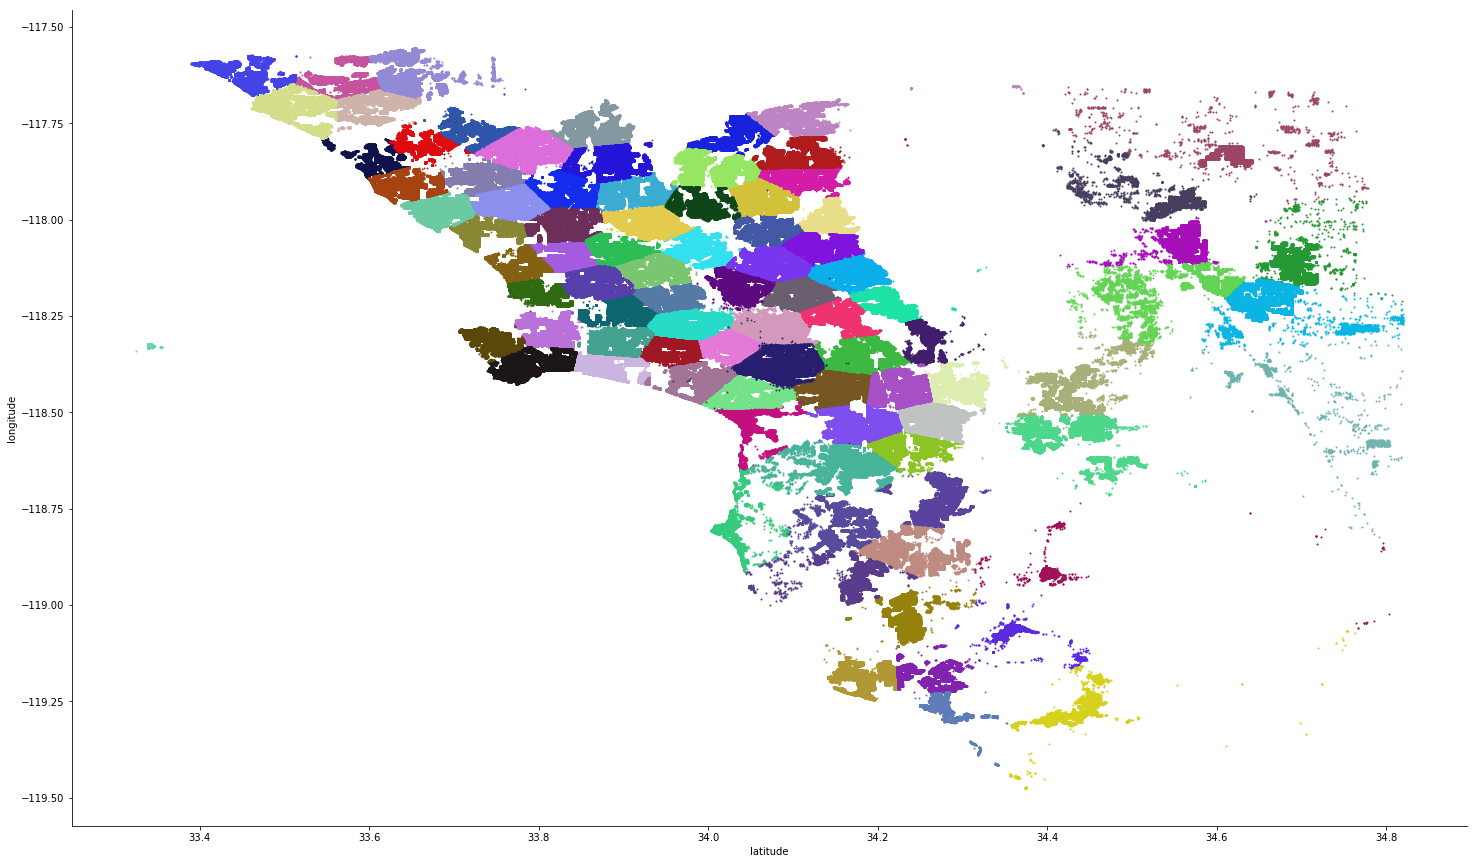

In [12]:
colors_used = []
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111)
ax.set_axis_bgcolor("white")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
for i in range(0, num_clusters):
    r1 = random.randint(10,240)
    r2 = random.randint(10,240)
    r3 = random.randint(10,240)
    color2 = '#%02X%02X%02X' % (r2,r3,r1)
    colors_used.append(color2)
    data = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ] 
    plt.scatter(data['latitude'], data['longitude'],s=1,color=color2)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

#### Intergrating crime data 

In [13]:
crime_data = pd.read_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw2/Crime_Data_from_2010_to_Present.csv', low_memory=False )

In [14]:
crime_zipcodes = []
search = ZipcodeSearchEngine()
for j in range( 0, crime_data['DR Number'].count()):
    location = crime_data.iloc[j][25]
    try:
        location = location.replace(')','').replace('(','').split(",")
        lat = location[0]
        lon = location[1]
        res = search.by_coordinate(float(lat), float(lon), radius=5, returns=1)
        try:
            crime_zipcodes.append(res[0]['Zipcode'])
        except:
            crime_zipcodes.append(np.nan)
    except:
        crime_zipcodes.append(np.nan)

In [15]:
new_column = pd.DataFrame({'ZIP': zipcode})
crime_data = crime_data.merge(new_column, left_index = True, right_index = True)
mode = crime_data['ZIP'].mode()
crime_data['ZIP'].fillna(mode.real[0], inplace=True)
crime_data.to_csv('crime_data_with_ZIP.csv')

In [16]:
crime_data = pd.read_csv('crime_data_with_ZIP.csv', low_memory=False )
numberofcrimes_byzip = crime_data.groupby('ZIP').size().reset_index(name='crime_counts')
joined_data = pd.merge(DataOfInterest, numberofcrimes_byzip, on='ZIP', how='left')
joined_data.drop(['Unnamed: 0'], axis=1, inplace=True)
joined_data[['latitude']] = joined_data[['latitude']] / 1000000
joined_data[['longitude']] = joined_data[['longitude']] / 1000000
joined_data.to_csv('properties_crime_data_merged.csv')

In [17]:
properties_crime = pd.read_csv('properties_crime_data_merged.csv', low_memory=False)

#### Clustering integrated data for a sample set of 1000 entries

In [32]:
sample_data = properties_crime[FeaturesForDisplay].head(1000)
clusters = 15
kmeans_eucledian = KMeans(n_clusters=clusters, random_state=0,n_init=10,n_jobs=-1).fit(sample_data)
labels = kmeans_eucledian.labels_
sample_data['cluster'] = kmeans_eucledian.labels_

map = folium.Map(location=[sample_data['latitude'].mean(), sample_data['longitude'].mean()], zoom_start=12)

for i in range(0, clusters):
    locations = sample_data.loc[ sample_data['cluster'] == i ] 
    locationlist = locations[['latitude', 'longitude']].values.tolist()
    r1 = random.randint(0,255)
    r2 = random.randint(0,255)
    r3 = random.randint(0,255)
    color2 = '#%02X%02X%02X' % (r2,r3,r1)
    for point in range(0, len(locationlist)):
        pop_string = "ID:" + str( locations.iloc[point]['parcelid'] ) + "  Stories:" + \
                        str( locations.iloc[point]['numberofstories'] ) + "  Year:" + \
                        str( locations.iloc[point]['yearbuilt'] ) + "  Tax:" + \
                        str( locations.iloc[point]['taxamount'] ) + " SqrFt:" + \
                        str( locations.iloc[point]['finishedsquarefeet15'] ) 
        folium.Marker(locationlist[point],popup=pop_string, 
                      icon=folium.Icon(color=colors[i%len(colors)], icon_color=color2)).add_to(map)
map.save(outfile='datamap_eucledian.html')
map

### Compute pairwise distance using the custom function defined and use the distance matrix to compute clusters

In [52]:
DistanceSampleData = properties_crime[FeaturesForDisplay].head(1000)

distance_custom = []

for i in range(0, 1000 ):
    temp_dist = []
    for j in range(0, 1000):
        temp_dist.append( customePairwise(DistanceSampleData.iloc[i],DistanceSampleData.iloc[j]) )
    distance_custom.append(temp_dist)

kmeans_eucledian = KMeans(n_clusters=clusters, random_state=0,n_init=10,n_jobs=-1).fit(distance_custom)
labels = kmeans_eucledian.labels_

DistanceSampleData['cluster'] = kmeans_eucledian.labels_

DistanceSampleData[['latitude']] = DistanceSampleData[['latitude']] / 1000000
DistanceSampleData[['longitude']] = DistanceSampleData[['longitude']] / 1000000

map = folium.Map(location=[DistanceSampleData['latitude'].mean(), DistanceSampleData['longitude'].mean()], zoom_start=12)

for i in range(0, clusters):
    locations = DistanceSampleData.loc[ DistanceSampleData['cluster'] == i ] 
    locationlist = locations[['latitude', 'longitude']].values.tolist()
    r1 = random.randint(0,255)
    r2 = random.randint(0,255)
    r3 = random.randint(0,255)
    color2 = '#%02X%02X%02X' % (r2,r3,r1)
    for point in range(0, len(locationlist)):
        pop_string = "ID:" + str( locations.iloc[point]['parcelid'] ) + "  Stories:" + \
                        str( locations.iloc[point]['numberofstories'] ) + "  Year:" + \
                        str( locations.iloc[point]['yearbuilt'] ) + "  Tax:" + \
                        str( locations.iloc[point]['taxamount'] ) + " SqrFt:" + \
                        str( locations.iloc[point]['finishedsquarefeet15'] ) 
        folium.Marker(locationlist[point], popup=pop_string, icon=folium.Icon(color=colors[i], icon_color=color2)).add_to(map)
map.save(outfile='datamap_custom.html')
map

In [18]:
logerror_data = pd.read_csv('/Users/kiranmayi/Desktop/Sem1/DSF_519/Hw2/train_2017.csv', low_memory=False)
training_data = pd.merge(properties_crime, logerror_data, on='parcelid', how='inner')
logerror_data['transactiondate'] = pd.to_datetime(logerror_data['transactiondate'])    
logerror_data['transactiondate']=logerror_data['transactiondate'].map(dt.datetime.toordinal)

In [19]:
logerror_data = logerror_data.groupby('parcelid', group_keys=False).apply(lambda x: x.loc[x.logerror.idxmin()])

In [32]:
DistanceSampleDataEuclidean = properties_crime[NewTotalFeatures]
num_clusters = 60
kmeans_eucledian = KMeans(n_clusters=num_clusters, random_state=0,n_init=10,n_jobs=-1,max_iter=600).fit(DistanceSampleDataEuclidean[FeaturesForDisplay])
labels = kmeans_eucledian.labels_
DistanceSampleDataEuclidean['cluster'] = kmeans_eucledian.labels_
print(len(kmeans_eucledian.labels_))

2985217


In [40]:
DistanceSampleDataEuclidean.to_csv("clusters_and_properties_final.csv")

In [24]:
def normalize(dataFrame):
    for col in dataFrame.keys():
        mean = np.mean(dataFrame[col])
        std = np.std(dataFrame[col])
        if std != 0:
            dataFrame[col] = (dataFrame[col]-mean)/std
    return dataFrame

In [42]:
from sklearn.svm import SVR
mean_mse = 0
final_predictions = []
actual_values = []
for i in range(0, num_clusters):
    data_cluster_i = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ]
    dataWithError_cluster_i = data_cluster_i.merge(logerror_data, on='parcelid', how='left')
    temp_X = dataWithError_cluster_i.loc[ pd.notnull(dataWithError_cluster_i['logerror'])  ]
    X = normalize(temp_X[FeaturesForModel])
    y = temp_X['logerror']
    #print(X.isnull().any())
    if len(X) == 0:
        continue
    if len(X) < 10:
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.05, random_state=30)
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    score = lm.score(X_test,y_test)
    mse = (((predictions - y_test.values) ** 2).sum()) / len(predictions)
    #print("LR Mean Square error: ", mse, "   score: ", score, "  n_samples: ", len(X) )
    actual_values = actual_values + y_test.tolist()

    mean_mse += mse;
    if len(X) >= 10:
        knn = KNeighborsRegressor(n_neighbors=3)
        knn.fit(X_train, y_train)
        predictions_kn = knn.predict(X_test)
        actual = y_test.values
        mse_kn = (((predictions_kn - actual) ** 2).sum()) / len(predictions_kn)
        score = knn.score(X_test,y_test)
        #print("KN Mean Square error: ", mse_kn, "   score: ", score )
        
        clf = SVR(C=1.0, epsilon=0.2)
        clf.fit(X_train.as_matrix(), y_train.as_matrix()) 
        predictions_sr = clf.predict(X_test.as_matrix())
        mse_sr = (((predictions_sr - actual) ** 2).sum()) / len(predictions_sr)
        score = clf.score(X_test.as_matrix(),y_test.as_matrix())
        #print("SR Mean Square error: ", mse_sr, "   score: ", score, "\n" )
        
    if mse_kn < mse:
        if mse_sr < mse_kn:
            final_predictions = final_predictions + predictions_sr.tolist()
        else:
            final_predictions = final_predictions + predictions_kn.tolist()
    else:
        if mse_sr < mse:
            final_predictions = final_predictions + predictions_sr.tolist()
        else:
            final_predictions = final_predictions + predictions.tolist()

print(" Actual MSE: ", (((np.array(final_predictions) - np.array(actual_values)) ** 2).sum()) / len(final_predictions))

 Actual MSE:  0.0211082321739


In [ ]:
from sklearn.svm import SVR

permuted_mse = []
for i in range(0, 100):
    final_predictions = []
    actual_values = []
    for i in range(0, num_clusters):
        data_cluster_i = DistanceSampleDataEuclidean.loc[ DistanceSampleDataEuclidean['cluster'] == i ]
        dataWithError_cluster_i = data_cluster_i.merge(logerror_data, on='parcelid', how='left')
        temp_X = dataWithError_cluster_i.loc[ pd.notnull(dataWithError_cluster_i['logerror'])  ]
        X = normalize(temp_X[FeaturesForModel])
        y = temp_X['logerror']
        if len(X) == 0:
            continue
        if len(X) < 10:
            X_train, X_test, y_train, y_test = X, X, y, y
        else:
            X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.05, random_state=30)
        y_test = np.random.permutation(y_test)
        lm = linear_model.LinearRegression()
        model = lm.fit(X_train,y_train)
        predictions = lm.predict(X_test)
        score = lm.score(X_test,y_test)
        mse = (((predictions - y_test) ** 2).sum()) / len(predictions)
        #print("LR Mean Square error: ", mse, "   score: ", score, "  n_samples: ", len(X) )
        actual_values = actual_values + y_test.tolist()

        if len(X) >= 10:
            knn = KNeighborsRegressor(n_neighbors=3)
            knn.fit(X_train, y_train)
            predictions_kn = knn.predict(X_test)
            actual = y_test
            mse_kn = (((predictions_kn - actual) ** 2).sum()) / len(predictions_kn)
            score = knn.score(X_test,y_test)
            #print("KN Mean Square error: ", mse_kn, "   score: ", score )
            
            clf = SVR(C=1.0, epsilon=0.2)
            clf.fit(X_train.as_matrix(), y_train.as_matrix())
            predictions_sr = clf.predict(X_test.as_matrix())
            mse_sr = (((predictions_sr - actual) ** 2).sum()) / len(predictions_sr)
            score = clf.score(X_test.as_matrix(),y_test)
            #print("SR Mean Square error: ", mse_sr, "   score: ", score, "\n" )
            
        if mse_kn < mse:
            if mse_sr < mse_kn:
                final_predictions = final_predictions + predictions_sr.tolist()
            else:
                final_predictions = final_predictions + predictions_kn.tolist()
        else:
            if mse_sr < mse:
                final_predictions = final_predictions + predictions_sr.tolist()
            else:
                final_predictions = final_predictions + predictions.tolist()

    permuted_mse.append((((np.array(final_predictions) - np.array(actual_values)) ** 2).sum()) / len(final_predictions))
    
print(permuted_mse)